# Mines Vs Rock classification using Artificial Neural Network Deep Learning algorithm

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from keras import Sequential
from keras.layers import Input, Dense
from keras.activations import relu, softmax
from keras.callbacks import *
from keras.models import load_model

Using TensorFlow backend.


## Reading the dataset as a pandas dataframe

In [2]:
data = pd.read_csv("sonar.all-data.csv")
data.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59,Feature 60,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
#Check if there are any null values in the dataset
data.isnull().sum().max()

0

In [4]:
#Encode the target variable to be an integer
encode_target = LabelEncoder()
data['Target'] = encode_target.fit_transform(data['Target'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
Feature 1     208 non-null float64
Feature 2     208 non-null float64
Feature 3     208 non-null float64
Feature 4     208 non-null float64
Feature 5     208 non-null float64
Feature 6     208 non-null float64
Feature 7     208 non-null float64
Feature 8     208 non-null float64
Feature 9     208 non-null float64
Feature 10    208 non-null float64
Feature 11    208 non-null float64
Feature 12    208 non-null float64
Feature 13    208 non-null float64
Feature 14    208 non-null float64
Feature 15    208 non-null float64
Feature 16    208 non-null float64
Feature 17    208 non-null float64
Feature 18    208 non-null float64
Feature 19    208 non-null float64
Feature 20    208 non-null float64
Feature 21    208 non-null float64
Feature 22    208 non-null float64
Feature 23    208 non-null float64
Feature 24    208 non-null float64
Feature 25    208 non-null float64
Feature 26    208 no

## Splitting the dataset into training set, validation set and testing set 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Target', axis=1), data['Target'], test_size=0.2, 
random_state=12, stratify=data['Target'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=12, stratify=y_train)
print(f"Shape of training set: {X_train.shape}")
print(f"Shape of validation set: {X_val.shape}")
print(f"Shape of testing set: {X_test.shape}")

Shape of training set: (149, 60)
Shape of validation set: (17, 60)
Shape of testing set: (42, 60)


In [7]:
X_train.shape[1:]

(60,)

## Building the ANN Architecture using Keras Tensorflow API

In [8]:
#model skeleton
model = Sequential([
    Dense(60), 
    Dense(50, activation=relu), 
    Dense(30, activation=relu),
    Dense(30, activation=relu),
    Dense(2, activation=softmax)
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
#Define callbacks so that the training can be interrupted when the model shows best performance on the validation set and saves the best model
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)
save_checkpoint = ModelCheckpoint('MVR Ann Model.h5', save_best_only=True)

## Training the ANN Deep Learning model on the training set

In [10]:
history = model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=500, validation_data=(X_val.to_numpy(), y_val.to_numpy()), callbacks=[save_checkpoint, early_stopping_callback])

amples
Epoch 1/500
149/149 [==============================] - 5s 31ms/step - loss: 0.6757 - accuracy: 0.5369 - val_loss: 0.6597 - val_accuracy: 0.5294
Epoch 2/500
149/149 [==============================] - 0s 241us/step - loss: 0.6725 - accuracy: 0.5369 - val_loss: 0.6584 - val_accuracy: 0.5294
Epoch 3/500
149/149 [==============================] - 0s 187us/step - loss: 0.6693 - accuracy: 0.5369 - val_loss: 0.6567 - val_accuracy: 0.5294
Epoch 4/500
149/149 [==============================] - 0s 201us/step - loss: 0.6665 - accuracy: 0.5503 - val_loss: 0.6557 - val_accuracy: 0.5294
Epoch 5/500
149/149 [==============================] - 0s 103us/step - loss: 0.6652 - accuracy: 0.5570 - val_loss: 0.6546 - val_accuracy: 0.5294
Epoch 6/500
149/149 [==============================] - 0s 91us/step - loss: 0.6637 - accuracy: 0.5839 - val_loss: 0.6535 - val_accuracy: 0.5882
Epoch 7/500
149/149 [==============================] - 0s 87us/step - loss: 0.6627 - accuracy: 0.5436 - val_loss: 0.6526 - va

In [11]:
#Load the best model saved during the training
best_model = load_model('MVR Ann Model.h5')

## Plotting the learning curves using the history object of the trained model

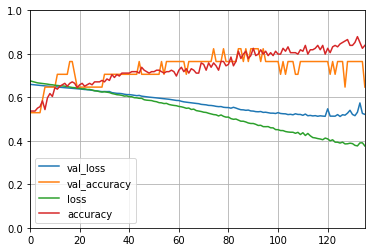

In [12]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate the model on the testing dataset

In [13]:
# Evaluating the early stopped model
test_loss, test_accuracy = model.evaluate(X_test.to_numpy(), y_test.to_numpy())
print(f"Test Loss:{test_loss}\nTest Accuracy: {test_accuracy}")

42/42 [==============================] - 0s 381us/step
Test Loss:0.5092175801595052
Test Accuracy: 0.7142857313156128


In [14]:
# Evaluating the best saved model
test_loss, test_accuracy = best_model.evaluate(X_test.to_numpy(), y_test.to_numpy())
print(f"Test Loss:{test_loss}\nTest Accuracy: {test_accuracy}")

42/42 [==============================] - 0s 3ms/step
Test Loss:0.5092175801595052
Test Accuracy: 0.7142857313156128


In [15]:
# Evaluating on the training dataset
train_preds = best_model.predict_classes(X_train)
print("*"*10+"Confusion Matrix on Training dataset"+"*"*10)
print(confusion_matrix(y_train, train_preds))
print("*"*8+"Classification Report on Training dataset"+"*"*9)
print(classification_report(y_train, train_preds))

**********Confusion Matrix on Training dataset**********
[[64 16]
 [ 7 62]]
********Classification Report on Training dataset*********
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        80
           1       0.79      0.90      0.84        69

    accuracy                           0.85       149
   macro avg       0.85      0.85      0.85       149
weighted avg       0.85      0.85      0.85       149



In [16]:
# Evaluating on the testing dataset
test_preds = best_model.predict_classes(X_test)
print("*"*10+"Confusion Matrix on Testing dataset"+"*"*10)
print(confusion_matrix(y_test, test_preds))
print("*"*8+"Classification Report on Testing dataset"+"*"*9)
print(classification_report(y_test, test_preds))

**********Confusion Matrix on Testing dataset**********
[[18  4]
 [ 8 12]]
********Classification Report on Testing dataset*********
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        22
           1       0.75      0.60      0.67        20

    accuracy                           0.71        42
   macro avg       0.72      0.71      0.71        42
weighted avg       0.72      0.71      0.71        42

